# Statistical Learning Homework 1

### **12112627 李乐平**

## Question 6

**Reproduce prostate cancer example, using methods including LSE, LASSO, Ridge Regression and Elastic Net.**

**Solution:**
In this section, I reproduced the result of Table 3-1, Table 3-2 and Table 3-3 in ESL. The script is as follows.

In [1]:
# !python -m pip install --user --upgrade seaborn
# !python -m pip install --user --upgrade statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import *
from sklearn.preprocessing import *

In [2]:
p = 67

pc_data = pd.read_csv("./hastie.su.domains_ElemStatLearn_datasets_prostate.data.csv")

train_df = pc_data.loc[pc_data.train == "T"]
test_df = pc_data.loc[pc_data.train != "T"]

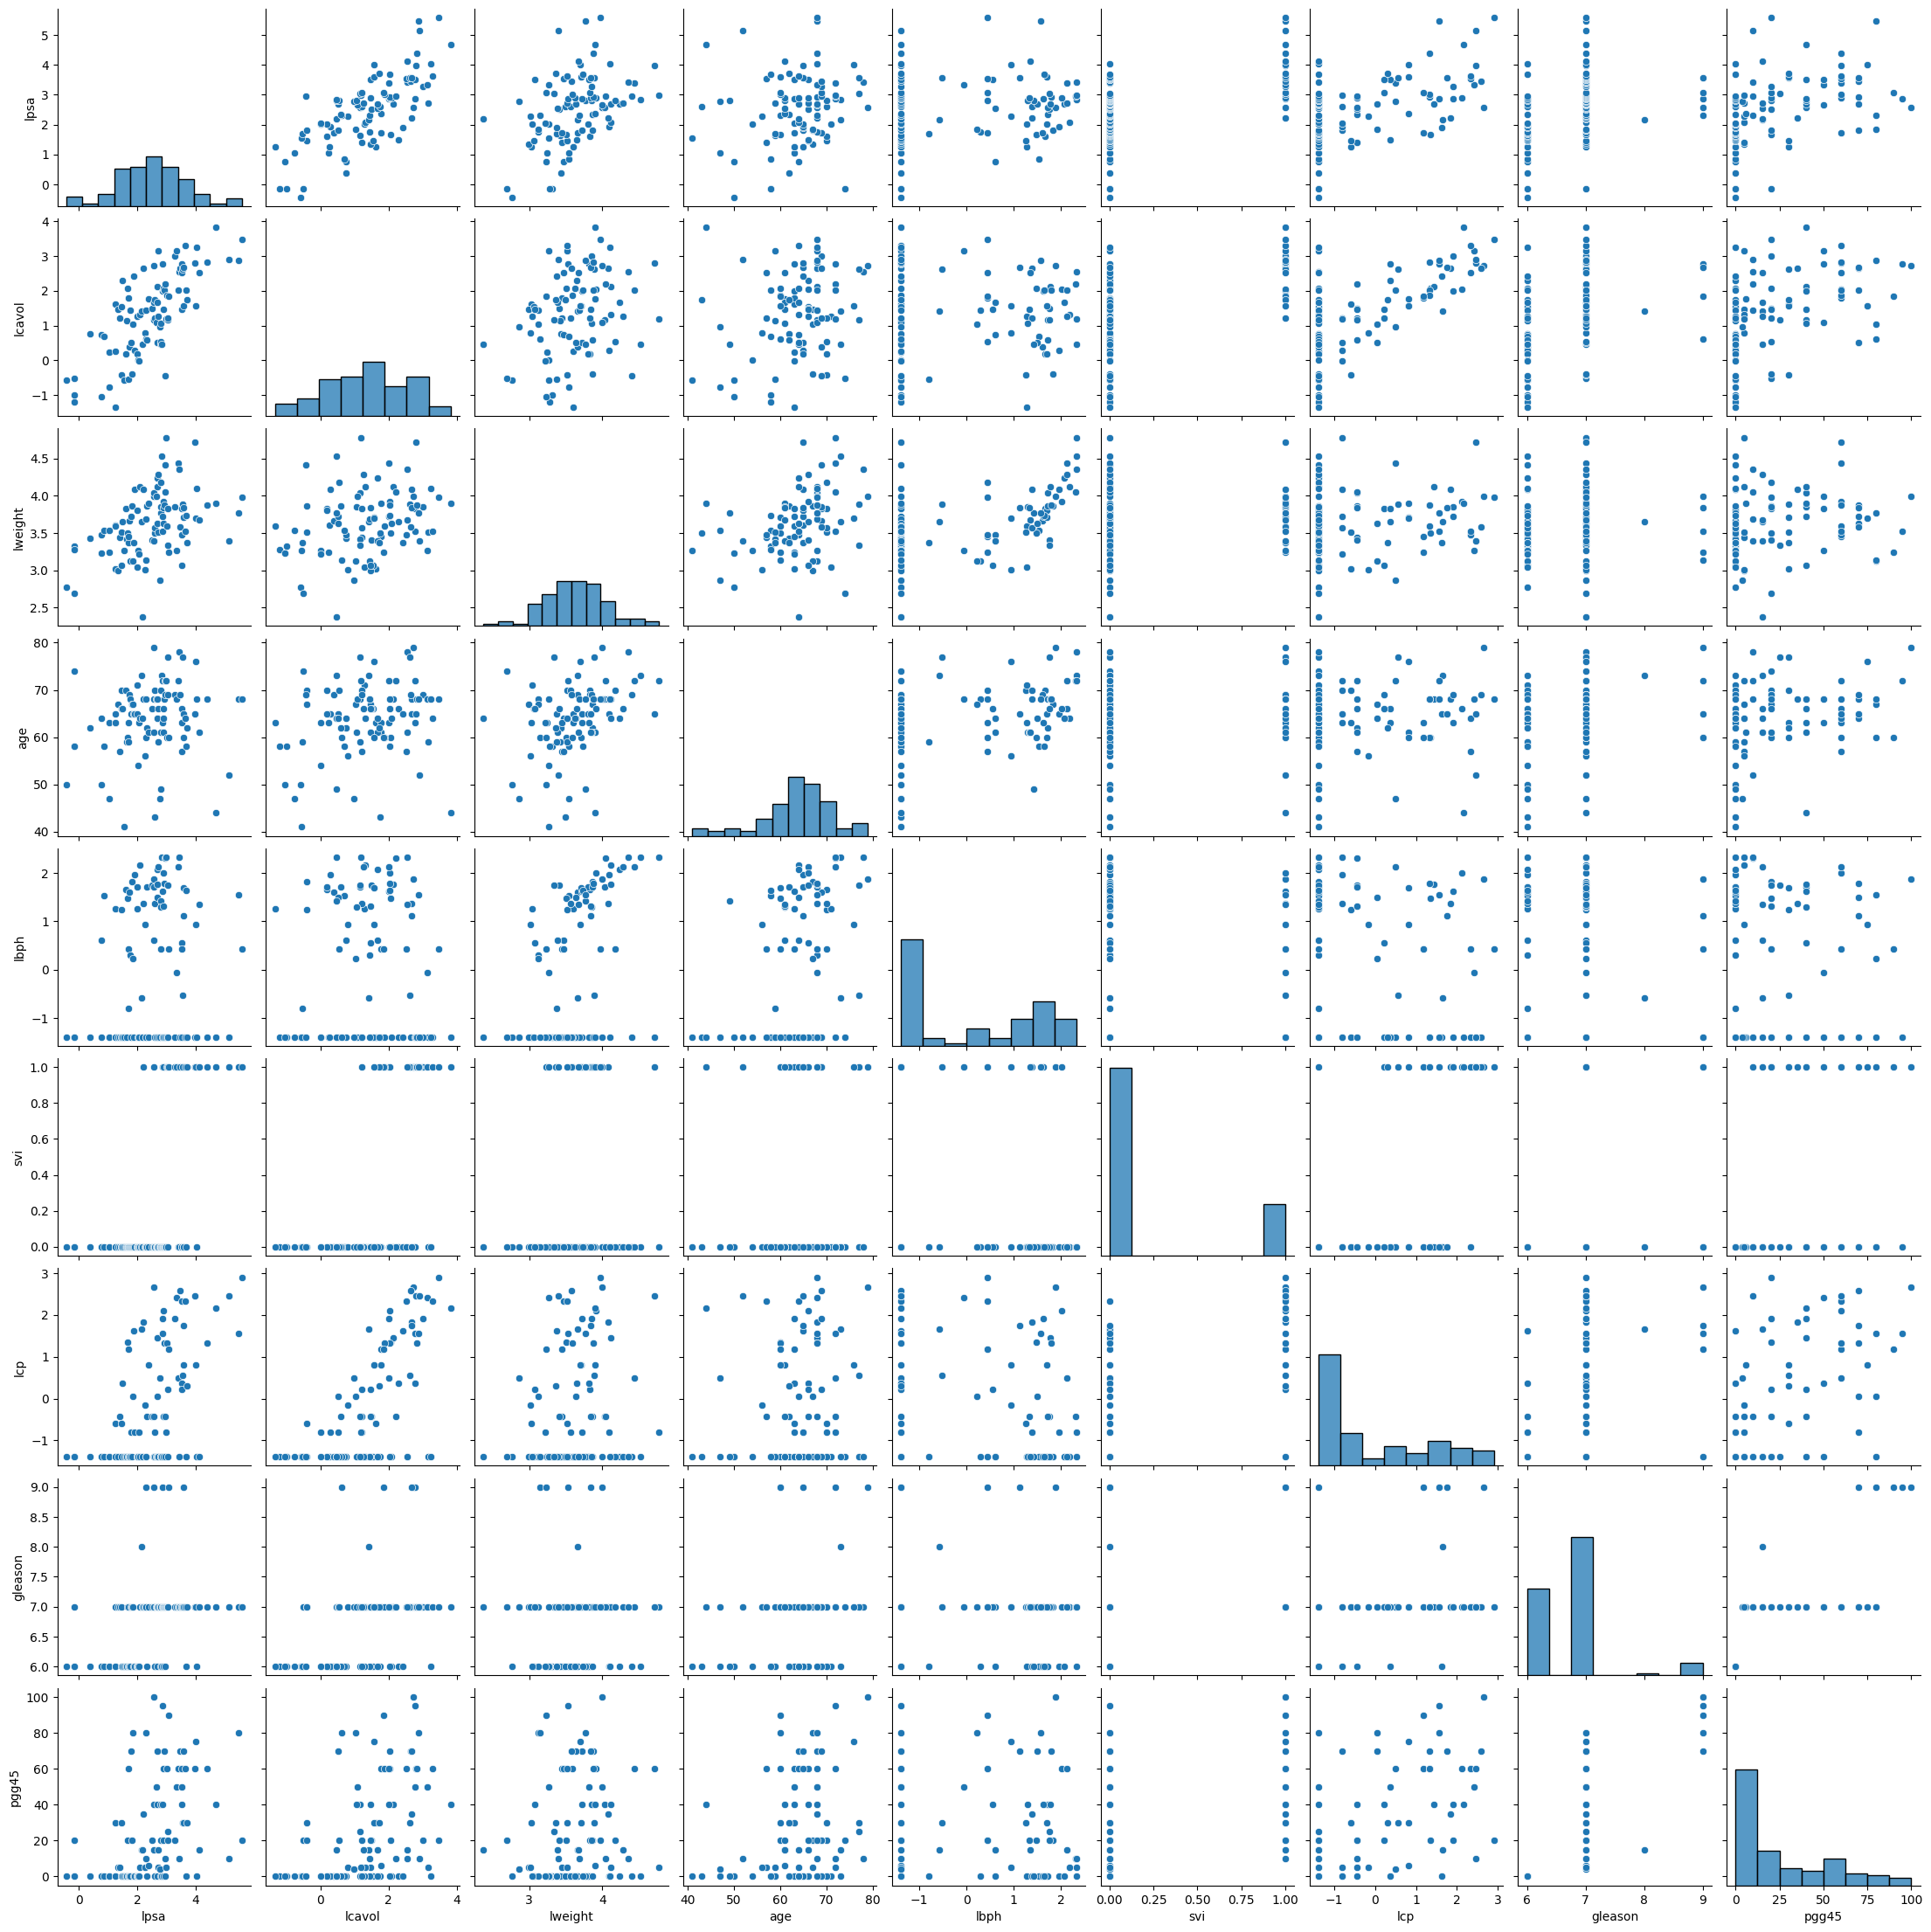

In [4]:
sns.pairplot(data = pc_data, vars = ["lpsa", "lcavol", "lweight", "age", "lbph", "svi", "lcp", "gleason", "pgg45"])

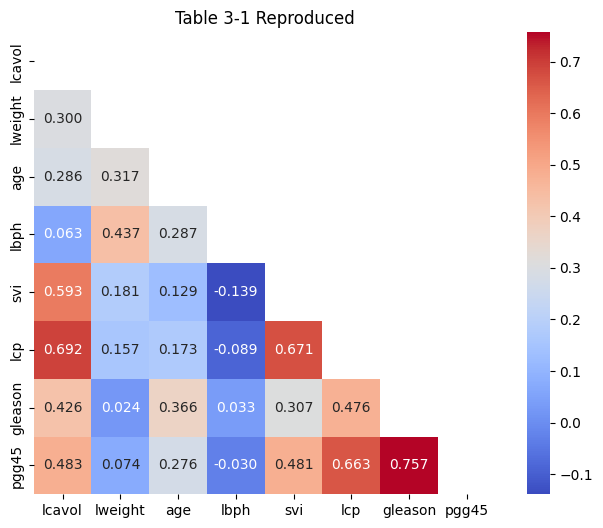

In [3]:
correlation_matrix = train_df.drop(["lpsa", "train"], axis = 1).corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", mask=mask, square=True)
plt.title("Table 3-1 Reproduced")
plt.show()

Next, perform the Least Square Estimation and reproduce Table 3-2.

In [4]:
X_origin = pc_data.drop(["lpsa", "train"], axis=1)
y = train_df["lpsa"]
y_test = test_df["lpsa"]

# Scale the whole dataset
scaler = StandardScaler()
X = scaler.fit_transform(X_origin)[pc_data.train == "T"]
X_test = scaler.fit_transform(X_origin)[pc_data.train != "T"]

model = sm.OLS(y, sm.add_constant(X)).fit()

coefficients = model.params
stderr = model.bse
z_scores = model.tvalues

ind_dict = {
    "const": "Intercept", 
    "x1": "lcavol", 
    "x2": "lweight", 
    "x3": "age",
    "x4": "lbph",
    "x5": "svi", 
    "x6": "lcp", 
    "x7": "gleason", 
    "x8": "pgg45"
}
results_df = pd.DataFrame({"Coefficient": coefficients, "Std. Error": stderr, "Z-Score": z_scores}).rename(index = ind_dict)

y_hat = model.predict(sm.add_constant(X_test))
ls_error_rate = np.mean((y_test - y_hat) ** 2)
ls_std_error = np.std((y_test - y_hat) ** 2, ddof = 1) / np.sqrt(y_test.size)

results_df
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.04e-12
Time:                        20:52:39   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4649      0.089     27.598      0.000       2.286       2.644
x1             0.6760      0.126      5.366      0.000       0.424       0.928
x2             0.2617      0.095      2.751      0.008       0.071       0.452
x3            -0.1407      0.101     -1.396      0.168      -0.343       0.061
x4             0.2091      0.102      2.056      0.044       0.006       0.413
x5             0.3036      0.123      2.469      0.017       0.057       0.550
x6            -0.2870      0.154     -1.867      0.067      -0.595       0.021
x7            -0.0212      0.144     -0.147      0.884      -0.310       0.268
x8             0.2656      0.153      1.738      0.088      -0.040       0.571
==============================================================================
Omnibus:                        0.825   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.389
Skew:                          -0.164   Prob(JB):                        0.823
Kurtosis:                       3.178   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, perform the LASSO, Ridge and Elastic Net Regression and reproduce Table 3-3. The result may slightly different to the original table.

In [7]:
lasso_model = Lasso(alpha = 0.209)

lasso_model.fit(X, y)

lasso_coefficients = lasso_model.coef_
lasso_coefficients = np.insert(lasso_coefficients, 0, lasso_model.intercept_)

y_hat = np.squeeze(lasso_model.predict(X_test))
lasso_error_rate = np.mean((y_test - y_hat) ** 2)
lasso_std_error = np.std((y_test - y_hat) ** 2, ddof = 1) / np.sqrt(y_test.size)

In [8]:
ridge_model = Ridge(alpha = 24)  

ridge_model.fit(X, y)

ridge_coefficients = ridge_model.coef_
ridge_coefficients = np.insert(ridge_coefficients, 0, ridge_model.intercept_)

y_hat = ridge_model.predict(X_test)
ridge_error_rate = np.mean((y_test - y_hat) ** 2)
ridge_std_error = np.std((y_test - y_hat) ** 2, ddof = 1) / np.sqrt(y_test.size)

In [9]:
elastic_net_model = ElasticNetCV(cv = 10) 

elastic_net_model.fit(X, y)

elastic_net_coefficients = elastic_net_model.coef_
elastic_net_coefficients = np.insert(elastic_net_coefficients, 0, elastic_net_model.intercept_)

y_hat = elastic_net_model.predict(X_test)
en_error_rate = np.mean((y_test - y_hat) ** 2)
en_std_error = np.std((y_test - y_hat) ** 2, ddof = 1) / np.sqrt(y_test.size)

In [10]:
ecdf = pd.DataFrame({
    "OLS": results_df["Coefficient"],
    "LASSO": lasso_coefficients, 
    "Ridge": ridge_coefficients, 
    "EN": elastic_net_coefficients
})

ecdf.loc["Test Error"] = {
    "OLS": ls_error_rate,
    "LASSO": lasso_error_rate,
    "Ridge": ridge_error_rate,
    "EN": en_error_rate
}

ecdf.loc["Std. Error"] = {
    "OLS": ls_std_error,
    "LASSO": lasso_std_error,
    "Ridge": ridge_std_error,
    "EN": en_std_error
}
ecdf

,OLS,LASSO,Ridge,EN
Intercept,2.464933,2.468346,2.464223,2.466754
lcavol,0.676016,0.535779,0.420106,0.657313
lweight,0.261694,0.187473,0.237861,0.260974
age,-0.140734,0.000000,-0.048296,-0.132089
lbph,0.209061,0.000000,0.161845,0.203565
svi,0.303623,0.085237,0.226399,0.294475
lcp,-0.287002,0.000000,-0.001086,-0.253085
gleason,-0.021195,0.000000,0.040716,-0.001772
pgg45,0.265576,0.006006,0.132123,0.236463
Test Error,0.521274,0.478962,0.490194,0.507957
